In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions...
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a markdown cell at the bottom, and put in a few notes addressing the following:
    <ul>
        <li> Accuracy of your models with/without feature selection. Include both train/test for each. Please use R2 and RMSE. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Hyperparameter Changes / Grid Search Improvements. What did you try, and why. Similar explaination to above, short. 
        <li> Overall this section should be roughly as long as this intro block - just outline what the results were, what you did to improve, and the results after. 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. 
    </ul>
</ul>

In [2]:
#Load Data
df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 13:55:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               1253 non-null   object 
 1   Age                                                     1226 non-null   float64
 2   Gender                                                  1243 non-null   object 
 3   City                                                    1253 non-null   object 
 4   Position                                                1247 non-null   object 
 5   Total years of experience                               1237 non-null   object 
 6   Years of experience in Germany                          1221 non-null   object 
 7   Seniority level                                         1241 non-null   object 
 8   Your main technology / programming lan

In [4]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,30,Full-time employee,Unlimited contract,English,51-100,Product
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product


#### Incremental EDA

Note: I'm writing this comment before I've started to make a solution. 
This data is real, and there are parts of the data that need processing to make sense. Right now, I'm not 100% sure what I'll need to do. I know that there are missing values in places, so I will need to impute. I know there are categorical values, so I'll need to encode. Those steps I can save until the end when I build a pipeline. For other stuff, I'm not so sure, so I'll start fixing things as I explore the data. first I'm going to construct the target variable, then I will go from there. There's a pretty high chance that I'll might kind of go back and forth a little. 

What I end up with for a pipeline won't be a bunch of steps that I make up right at the start, like it is for simple problems. My exploration will show what I need to do, then I'll go back and construct as much of that stuff as possible into a pipeline. After the target I'll look through things in order. 

In [5]:
# Construct Target by adding salary and bonus. 
df["Bonus"] = pd.to_numeric(df["Yearly bonus + stocks in EUR"], downcast="float", errors="coerce")
df["Bonus"].fillna(0, inplace=True)
df["target"] = df["Yearly brutto salary (without bonus and stocks) in EUR"] + df["Bonus"]
df.drop(columns={"Timestamp","Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "Bonus"}, inplace=True)
df.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,target
0,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",30,Full-time employee,Unlimited contract,English,51-100,Product,85000.0
1,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,80000.0
2,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,240000.0
3,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,54000.0
4,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",29,Full-time employee,Unlimited contract,English,101-1000,Product,62000.0


##### Age - Numeric. Scale in pipe.
##### Gender - Cat. Encode in pipe.
##### City - Cat. Need to see what is in there...
##### Position - Cat. Need to see what is in there...

<AxesSubplot:xlabel='target', ylabel='Density'>

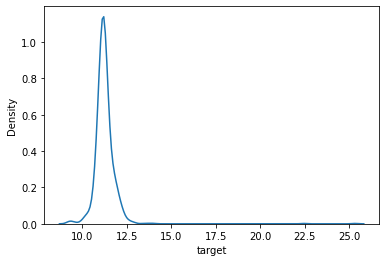

In [6]:
tmp = np.log(df["target"])
sns.kdeplot(data=tmp)

In [7]:
df["City"].value_counts()

Berlin         681
Munich         236
Frankfurt       44
Hamburg         40
Stuttgart       26
              ... 
Nuremberg        1
Lübeck           1
Malta            1
Dresden          1
Saarbrücken      1
Name: City, Length: 119, dtype: int64

Replace the cities that are sparsely represented with "other". 

In [8]:
def replace_low_freq(d, col, threshold=10, replacement='other'):
    value_counts = d[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    tmp = d[col].replace(to_replace=to_remove, value=replacement)
    return tmp

In [9]:
df["City"] = replace_low_freq(df, "City", 10, "Other")
df["City"].value_counts()

Berlin       681
Munich       236
Other        206
Frankfurt     44
Hamburg       40
Stuttgart     26
Cologne       20
Name: City, dtype: int64

In [10]:
to_scale = ["Age"]
to_enc = ["Gender", "City" ]

In [11]:
# Position
#pd.set_option("display.max_rows", None)
df.rename(columns={"Position ":"Position"}, inplace=True)
df["Position"].value_counts().head(20)

Software Engineer      387
Backend Developer      174
Data Scientist         110
Frontend Developer      89
QA Engineer             71
DevOps                  57
Mobile Developer        53
ML Engineer             42
Product Manager         39
Data Engineer           25
Designer (UI/UX)        16
Engineering Manager     10
Data Analyst             8
CTO                      5
SRE                      4
Fullstack Developer      4
Project Manager          4
Software Architect       4
Team Lead                3
Hardware Engineer        3
Name: Position, dtype: int64

There are probably too many job titles to deal with accurately, and many are similar. I'm going to group some together. If this was a real thing, we'd want to do this even better - I'm going to try to group careers into a few subsets - Programmers, Data Science, QA, DevOps. In reality, we'd do this more granularly and accurately. 

<AxesSubplot:xlabel='Position', ylabel='target'>

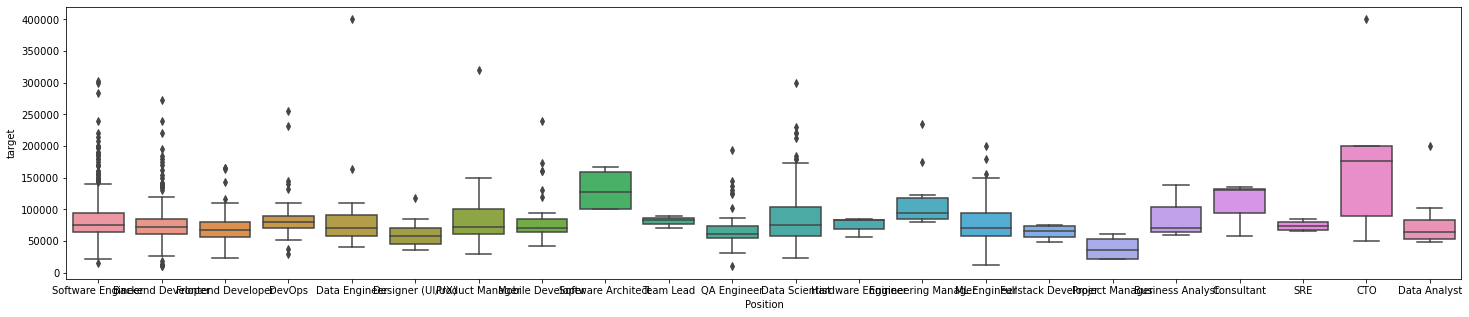

In [12]:
#Look at salaries to proof the grouping
df = df[df["target"]<500000]
df_tmp = df[df.groupby("Position")["Position"].transform('size') > 2]
plt.figure(figsize=(25,5))
sns.boxplot(data=df_tmp, x="Position", y="target")

Based on this, grouping some of the developer positions probably won't be a huge error. If I was blending groups that had very different salaries, that would introduce error. The boxplot also caused me to filter out some salary outliers, I chose $500,000 as a cutoff because there were a few people who made crazy amounts. I think we are safe by not considering the odd bizillionaire in the model. 

If this was real, you'd do a better job of this! You'd have people with a better understanding of the exact details of each job title, I generalized. 

In [13]:
career_map = {"Software Engineer":"Developer",
            "Backend Developer":"Developer",
            "Frontend Developer":"Developer",
            "Mobile Developer":"Developer",
            "Designer (UI/UX)":"Developer",
            "Fullstack Developer":"Developer",
            "Data Scientist":"Data Science",
            "Data Engineer":"Data Science",
            "Data Analyst":"Data Science",
            "ML Engineer":"Data Science",
            "QA Engineer":"Operations",
            "DevOps":"Operations",
            "SRE":"Operations",
            "Product Manager":"Operations",
            "Engineering Manager":"Management",
            "CTO":"Management",
            "Software Architect":"Management",
            "Software Architect":"Management",
            "Team Lead":"Management"}

In [14]:
df["Pro_Position"] = df["Position"].map(career_map).fillna("Other")
df["Pro_Position"].value_counts()
to_enc.append("Pro_Position")

##### Total years of experience - numeric. Scale in pipe.
##### Years of experience in Germany - numeric. Scale in pipe. 

In [15]:
to_scale.append("Total years of experience")
to_scale.append("Years of experience in Germany")

In [16]:
df["Seniority level"].value_counts()

Senior                                       564
Middle                                       365
Lead                                         164
Junior                                        79
Head                                          44
Principal                                      3
student                                        1
Intern                                         1
Entry level                                    1
Working Student                                1
C-Level                                        1
no idea, there are no ranges in the firm       1
Student                                        1
intern                                         1
Key                                            1
C-level executive manager                      1
Director                                       1
No level                                       1
CTO                                            1
Work Center Manager                            1
Manager             

Replace the senority levels that are sparsely represented. 

In [17]:
df["Seniority level"] = replace_low_freq(df, "Seniority level", 5, "Other")
df["Seniority level"].value_counts()

Senior    564
Middle    365
Lead      164
Junior     79
Head       44
Other      21
Name: Seniority level, dtype: int64

In [18]:
to_enc.append("Seniority level")

In [19]:
df["Your main technology / programming language"].value_counts()

Java                 184
Python               164
PHP                   56
C++                   38
JavaScript            34
                    ... 
SAP BW / ABAP          1
Go, PHP, SQL           1
Kotlin                 1
Jira                   1
consumer analysis      1
Name: Your main technology / programming language, Length: 254, dtype: int64

Replace the tech that is sparsely represented. 

In [20]:
df["Your main technology / programming language"] = replace_low_freq(df, "Your main technology / programming language", 15, "Other")
df["Your main technology / programming language"].value_counts()

Other         428
Java          184
Python        164
PHP            56
C++            38
JavaScript     34
Javascript     31
C#             30
python         26
Scala          24
Go             23
Swift          23
Kotlin         22
Python         21
Ruby           19
Name: Your main technology / programming language, dtype: int64

In [21]:
to_enc.append("Your main technology / programming language")

In [22]:
df["Number of vacation days"].value_counts()

30                                              488
28                                              233
27                                              102
25                                               91
26                                               70
24                                               67
29                                               24
20                                               13
21                                               10
31                                                8
22                                                8
32                                                8
36                                                5
23                                                4
35                                                4
40                                                4
0                                                 4
33                                                3
unlimited                                         3
14          

Force vacation days to be numeric. The weird stuff is pretty infrequent, so if we drop it that shouldn't kill us. 

In [23]:
df["Number of vacation days"] = df["Number of vacation days"].apply(lambda x: pd.to_numeric(x, errors='coerce'))
df["Number of vacation days"].value_counts()
to_scale.append("Number of vacation days")

In [24]:
df["Employment status"].value_counts()

Full-time employee                                                                 1186
Self-employed (freelancer)                                                           28
Part-time employee                                                                    8
Founder                                                                               3
Company Director                                                                      1
working student                                                                       1
Working Student                                                                       1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
Intern                                                                                1
full-time, but 32 hours per week (it was my request, I'm a student)                   1
Werkstudent                                                                           1
Name: Employment status, dtype: 

Similar stuff for other low frequency columns below. 

In [25]:
emp_map = {"Full-time employee":"Full Time",
            "Self-employed (freelancer)":"Freelance"}
df["Employment status"] = df["Employment status"].map(emp_map).fillna("Other")
df["Employment status"].value_counts()
to_enc.append("Employment status")

In [26]:
df["Сontract duration"].value_counts()
cont_map = {"Unlimited contract":"Unlimited contract",
           "Temporary contract":"Temporary contract"}
df["Сontract duration"] = df["Сontract duration"].map(cont_map).fillna("Unlimited contract")
df["Сontract duration"].value_counts()
to_enc.append("Сontract duration")

In [27]:
df["Main language at work"].value_counts()
df["Main language at work"] = replace_low_freq(df, "Main language at work", 10, "Other")
df["Main language at work"].value_counts()
to_enc.append("Main language at work")

In [28]:
df["Company size"].value_counts()
to_enc.append("Company size")

In [29]:
df["Company type"].value_counts()
df["Company type"] = replace_low_freq(df, "Company type", 10, "Other")
df["Company type"].value_counts()
to_enc.append("Company type")

We now have two sets of data that should be relatively clean - the numeric stuff to scale, and the categorical stuff to encode. 

In [30]:
print("Categorical:", to_enc)
print("Numerical:", to_scale)

Categorical: ['Gender', 'City', 'Pro_Position', 'Seniority level', 'Your main technology / programming language', 'Employment status', 'Сontract duration', 'Main language at work', 'Company size', 'Company type']
Numerical: ['Age', 'Total years of experience', 'Years of experience in Germany', 'Number of vacation days']


### Prep for Modelling

I now have a list of variables that I want to treat as categorical and encode, as well as a list that I want to treat as numerical and scale. Now I can get to modelling. 

Of the above stuff, some of it could be condensed and/or put into a pipeline. The downside with doing so is that I didn't come in having any idea what type of action I'd need to take on each feature. Even for the things that have relatively simple prep steps, such as replacing low frequency items, involved me looking at the data and deciding on a reasonable cutoff. If we are confident that future data will follow a similar pattern, we'd want to make our steps into a pipeline. 

##### Example Custom Transformer

This is an example of a simple custom transformer, as well as a look at what it does. 

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin
class OtherTransformer(BaseEstimator, TransformerMixin):
    #the constructor
    def __init__(self, threshold=10):
        self.thresh = threshold
        return None
    #estimator method
    def fit(self, X, y = None):
        return self
    #transfprmation
    def transform(self, X, y=None):
        value_counts = X.value_counts() # Specific column 
        to_remove = value_counts[value_counts <= self.thresh].index
        tmp = X.replace(to_replace=to_remove, value="Other")
        return tmp

In [32]:
testTrans = OtherTransformer(threshold=10)
testTrans.transform(df["Your main technology / programming language"]).value_counts()

Other         428
Java          184
Python        164
PHP            56
C++            38
JavaScript     34
Javascript     31
C#             30
python         26
Scala          24
Go             23
Swift          23
Kotlin         22
Python         21
Ruby           19
Name: Your main technology / programming language, dtype: int64

In [33]:
for col in to_scale:
    df[col].replace(",",".",regex=True, inplace=True)
    #df[col] = df[col].astype(float)
    df[col] = pd.to_numeric(df[col], errors="coerce")
for col in to_enc:
    df[col] = df[col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248 entries, 0 to 1252
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   Age                                                     1222 non-null   float64 
 1   Gender                                                  1239 non-null   category
 2   City                                                    1248 non-null   category
 3   Position                                                1243 non-null   object  
 4   Total years of experience                               1229 non-null   float64 
 5   Years of experience in Germany                          1207 non-null   float64 
 6   Seniority level                                         1237 non-null   category
 7   Your main technology / programming language             1123 non-null   category
 8   Other technologies/programmi

In [34]:
all_cols = to_enc + to_scale + ["target"]
df2 = df.drop(columns=[col for col in df if col not in all_cols])
df2.head()

,Age,Gender,City,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,target,Pro_Position
0,26.0,Male,Munich,5.0,3.0,Senior,Other,30.0,Full Time,Unlimited contract,English,51-100,Product,85000.0,Developer
1,26.0,Male,Berlin,7.0,4.0,Senior,Ruby,28.0,Full Time,Unlimited contract,English,101-1000,Product,80000.0,Developer
2,29.0,Male,Berlin,12.0,6.0,Lead,Other,30.0,Freelance,Temporary contract,English,101-1000,Product,240000.0,Developer
3,28.0,Male,Berlin,4.0,1.0,Junior,Javascript,24.0,Full Time,Unlimited contract,English,51-100,Startup,54000.0,Developer
4,37.0,Male,Berlin,17.0,6.0,Senior,Other,29.0,Full Time,Unlimited contract,English,101-1000,Product,62000.0,Developer


## Predict. 

The actual prediction accuracy mainly depends on what model and HP are used. 

In [35]:
#Create Pipeline and Model 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

numeric_features = to_scale
numeric_transformer = Pipeline( steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", MinMaxScaler())
    ])

categorical_features = to_enc
categorical_transformer = Pipeline( steps=[
        #("best", SelectKBest(score_func=f_regression)),
        ("encode", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer( transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ], remainder="drop")

#Split data
y = df2["target"]
X = df2.drop(columns={"target"})
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)



#Recursive Feature Selection
rfecv = RFECV(
    estimator=Lasso(max_iter=10000),
    step=1,
    cv=5,
    scoring="r2",
    min_features_to_select=3,
)

# Model
#model = SGDRegressor(max_iter=10000, penalty="elasticnet", early_stopping=True)
model = RandomForestRegressor(n_jobs=-1, n_estimators=500)
#model = Lasso()
#model = Ridge(max_iter=100000)

#Build pipeline
pipeline_steps = [('pre', preprocessor),
                ("fs", rfecv),
                ('model', model) ]
pipe = Pipeline(pipeline_steps)
pipe.fit(X_train, y_train)

print("Depth:", pipe.named_steps['model'])
print("Features:", rfecv.n_features_, rfecv.n_features_in_)
print("Train R2:", pipe.score(X_train, y_train))
print("Train RMSE:", mean_squared_error(y_train, pipe.predict(X_train), squared=False))
print("Test R2:", pipe.score(X_test, y_test))
print("Test RMSE:", mean_squared_error(y_test, pipe.predict(X_test), squared=False))

#print("Train R2:", pipe.score(X_train, y_train))
#print("Train RMSE:", mean_squared_error(y_train, pipe.predict(X_train), squared=False))
#print("Test R2:", pipe.score(X_test, y_test))
#print("Test RMSE:", mean_squared_error(y_test, pipe.predict(X_test), squared=False))

(936, 14)
Depth: RandomForestRegressor(n_estimators=500, n_jobs=-1)
Features: 54 64
Train R2: 0.8851411595299097
Train RMSE: 13898.84911412778
Test R2: 0.2468111391887714
Test RMSE: 39920.0064656058


### Try with a log transformed target

In [36]:
from sklearn.compose import TransformedTargetRegressor
#ccp_alpha=.01, max_features="sqrt", 
params = {'model__regressor__max_depth':[9,10,11,12,13,14],
            'model__regressor__ccp_alpha':[.0001, .0005, .001, .005, .01, .05, .1, .5, 1],
            'model__regressor__max_features':["sqrt","log2"]}

model_ttr = TransformedTargetRegressor(regressor=model, func=np.log, inverse_func=np.exp)
pipeline_steps2 = [('pre', preprocessor),
                ("fs", rfecv),
                ('model', model_ttr) ]
pipe2 = Pipeline(pipeline_steps2)

clf = GridSearchCV(pipe2, param_grid=params, cv=3, n_jobs=-1) 

clf.fit(X_train, y_train.ravel())
best = clf.best_estimator_

#clf.fit(X_train, y_train.ravel())
#best = clf.best_estimator_
print("Test r2:", best.score(X_test, y_test))
print("Test RMSE:", mean_squared_error(y_test, best.predict(X_test), squared=False))
print(best)

Test r2: 0.19036334986972503
Test RMSE: 41388.88610059807
Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age',
                                                   'Total years of experience',
                                                   'Years of experience in '
                                                   'Germany',
                                                   'Number of vacation days']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                           